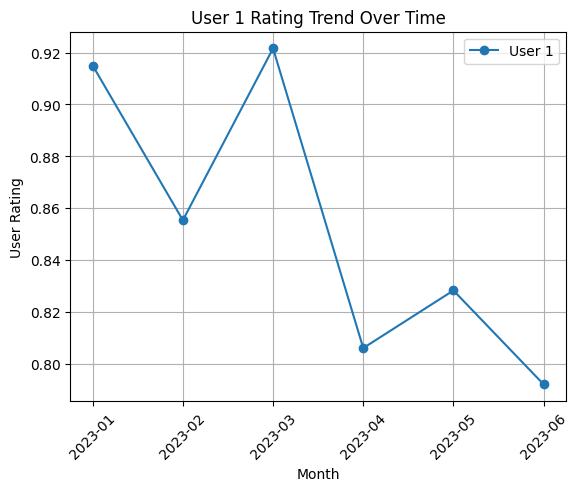

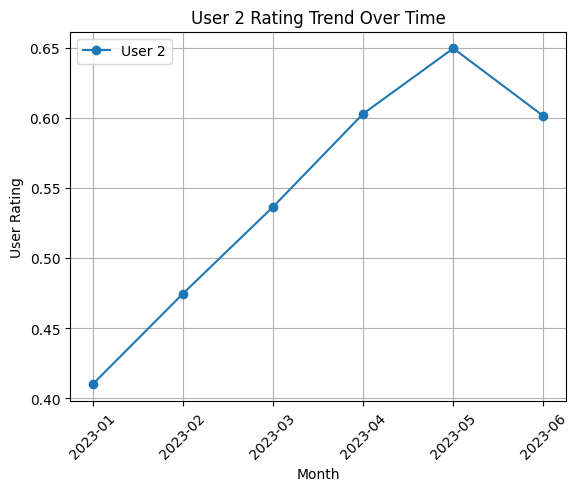

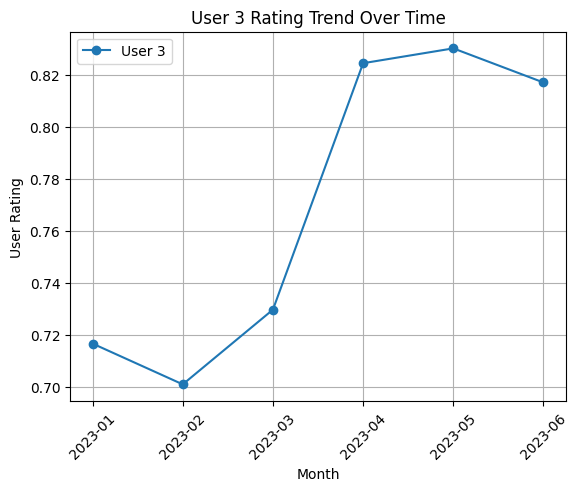

<ipython-input-2-af03fe9934b2>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  latest_month['segment'] = latest_month.apply(segment_user, axis=1)


    user_id  user_rating              segment
5         1     0.792000              Neutral
11        2     0.601333              Neutral
17        3     0.817000  High Value Customer

Segment Distribution:
segment
Neutral                2
High Value Customer    1
Name: count, dtype: int64


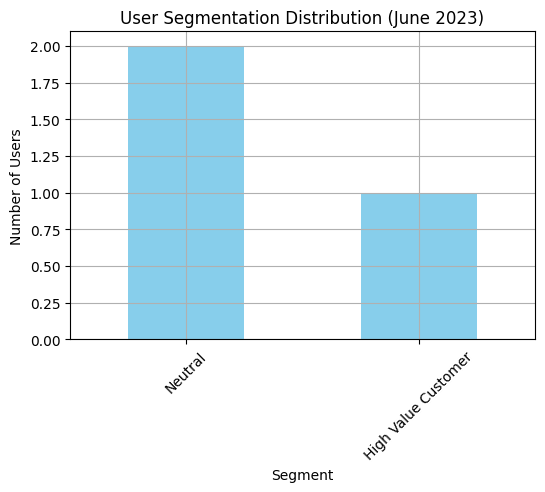

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Simulating User Data for Multiple Time Periods (6 months)
# Each row represents the rating data for a user at a given month
data = {
    'user_id': [1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3],
    'month': ['2023-01', '2023-02', '2023-03', '2023-04', '2023-05', '2023-06',
              '2023-01', '2023-02', '2023-03', '2023-04', '2023-05', '2023-06',
              '2023-01', '2023-02', '2023-03', '2023-04', '2023-05', '2023-06'],
    'total_orders': [10, 12, 11, 15, 13, 16, 20, 21, 22, 25, 23, 24, 15, 16, 14, 17, 18, 16],
    'return_requests': [1, 2, 1, 3, 1, 4, 10, 9, 8, 7, 6, 7, 5, 5, 4, 3, 4, 3],
    'avg_return_timing': [0.9, 0.8, 0.9, 0.7, 0.6, 0.7, 0.2, 0.3, 0.4, 0.5, 0.6, 0.5, 0.7, 0.6, 0.7, 0.8, 0.9, 0.8],
    'return_success_rate': [0.95, 0.94, 0.96, 0.92, 0.93, 0.94, 0.50, 0.52, 0.54, 0.55, 0.58, 0.56, 0.80, 0.82, 0.78, 0.85, 0.83, 0.84],
}

# Create a DataFrame
df = pd.DataFrame(data)

# Weighting factors for different criteria (User Rating Formula)
W_ratio = 0.4  # Weight for return ratio
W_timing = 0.3  # Weight for return timing
W_success = 0.3  # Weight for return success rate

# Calculating Return Request Ratio
df['return_request_ratio'] = df['return_requests'] / df['total_orders']

# Apply user rating formula for each user at each month
df['user_rating'] = (W_ratio * (1 - df['return_request_ratio'])) + \
                    (W_timing * df['avg_return_timing']) + \
                    (W_success * df['return_success_rate'])

# Ensure ratings are between 0.1 and 1.0
df['user_rating'] = df['user_rating'].clip(lower=0.1, upper=1.0)

# Trend Analysis: Plotting User Ratings Over Time
def plot_user_trend(user_id):
    user_data = df[df['user_id'] == user_id]
    plt.plot(user_data['month'], user_data['user_rating'], marker='o', label=f'User {user_id}')
    plt.title(f'User {user_id} Rating Trend Over Time')
    plt.xlabel('Month')
    plt.ylabel('User Rating')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.legend()
    plt.show()

# Plot the trend for User 1, 2, and 3
plot_user_trend(1)
plot_user_trend(2)
plot_user_trend(3)

# Segmentation Based on Current Behavior (Latest Month)
latest_month = df[df['month'] == '2023-06']

# Define Segmentation Logic
def segment_user(row):
    if row['return_request_ratio'] > 0.5:
        return 'Frequent Returner'
    elif row['return_success_rate'] >= 0.8 and row['return_request_ratio'] <= 0.2:
        return 'High Value Customer'
    elif row['avg_return_timing'] < 0.3:
        return 'Late Returner'
    else:
        return 'Neutral'

# Apply segmentation
latest_month['segment'] = latest_month.apply(segment_user, axis=1)

# Display the segmented users
print(latest_month[['user_id', 'user_rating', 'segment']])

# Summary of Segmentation Counts
segment_counts = latest_month['segment'].value_counts()
print("\nSegment Distribution:")
print(segment_counts)

# Plot Segmentation Distribution
plt.figure(figsize=(6, 4))
segment_counts.plot(kind='bar', color='skyblue')
plt.title('User Segmentation Distribution (June 2023)')
plt.xlabel('Segment')
plt.ylabel('Number of Users')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()
